<a href="https://colab.research.google.com/github/dksingh24/Exploratory_Analysis/blob/main/Suicide_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## India Suicides - Data Analysis
Done By - Sakhil, Sachin, **Dushyan**t, Anurag, Ankit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
!wget -O "Suicides in India 2001-2012.csv" "https://raw.githubusercontent.com/dksingh24/Exploratory_Analysis/main/Analyzing%20Suicide%20Trends%20in%20India%20(2001-2012)/Suicides%20in%20India%202001-2012.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df = pd.read_csv("Suicides in India 2001-2012.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Suicides in India 2001-2012.csv'

In [43]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


For Cleaning let's first remove the rows where Total = 0(i.e. with 0 suicides)



In [15]:
df = df[df['Total'] != 0]

In [16]:
df = df.query('Total != 0')

Also let's remove age group 0-100+

In [17]:
df = df[df['Age_group'] != '0-100+']

In [18]:
df = df.query('Age_group != 0-100')

In [19]:
print ( "Number of rows are", df.shape[0])
print ( "Number of columns are", df.shape[1])

Number of rows are 92159
Number of columns are 7


In [20]:
print ( " Indian states where the data is collected from ", df['State'].unique())

 Indian states where the data is collected from  ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


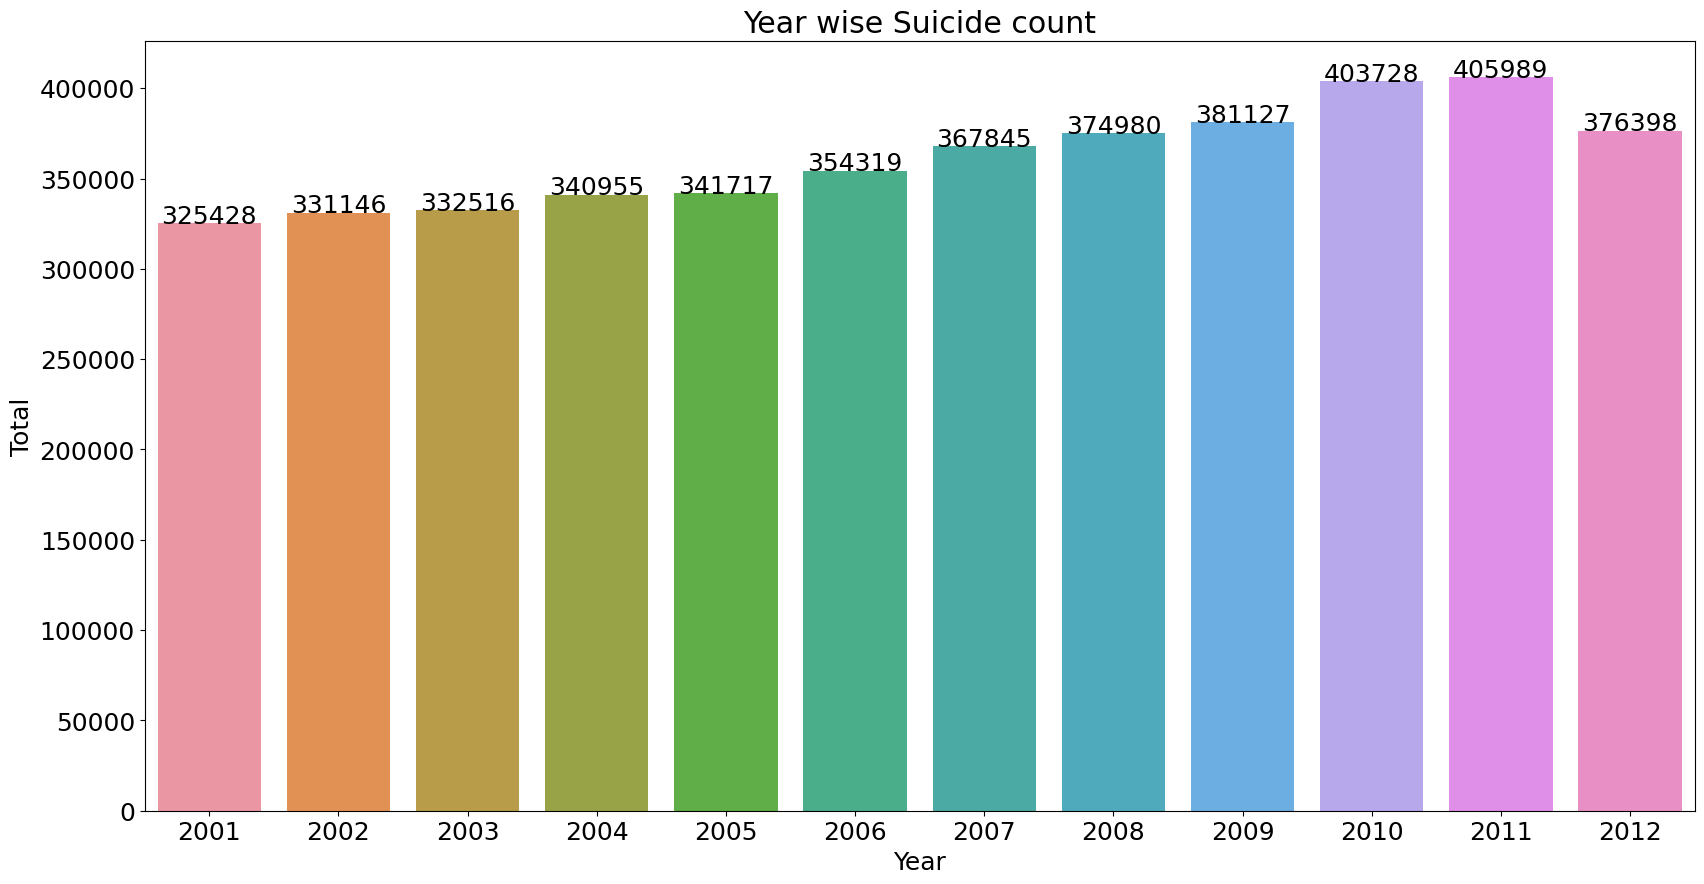

In [21]:
# column Total is number of suicides .
# Yearwise sucides.
yearwise= df[['Year', 'Total']].groupby('Year').sum()
yearwise.reset_index(inplace = True)
#yearwise
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,10)) # Make a plot size
trace = sns.barplot(x = yearwise['Year'], y = yearwise['Total'], data = yearwise)
# Adding values on the top of the bars
for index, row in yearwise.iterrows():
    trace.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title('Year wise Suicide count')
plt.show()

In [22]:
round((yearwise['Total'].max() - yearwise['Total'].min())/yearwise['Total'].min()*100, 2)

24.76

<p> <span style="color:blue">Year 2011 recorded highest suicides ( 405989)  <em> </span>.</p>
<p> <span style="color:blue">From Year 2001 to 2011 sucides rate is increased by 24.76% <em> </span>.</p>

 **Yearly Males , Females suicide rates**

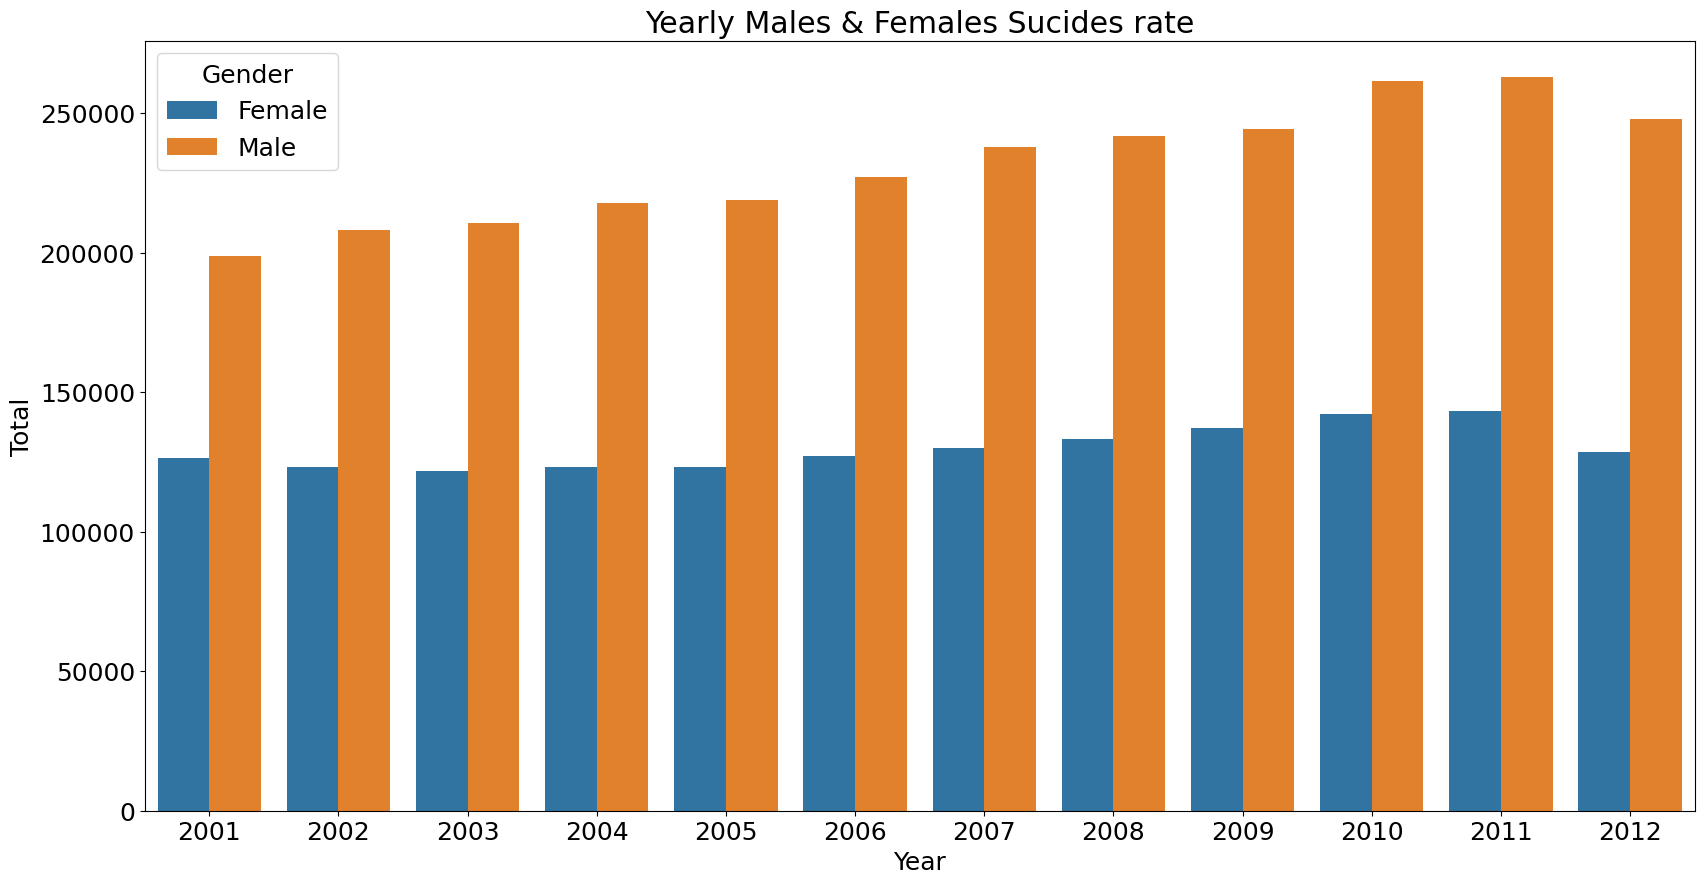

In [23]:
gender_wise = df[['Year', 'Gender','Total']].groupby(['Year', 'Gender']).sum()
gender_wise.reset_index(inplace = True)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,10)) # Make a plot size
plt.title('Yearly Males & Females Sucides rate')
ax = sns.barplot(x = 'Year', y = 'Total', hue = 'Gender', data = gender_wise)
plt.show()

### Men appear to be more vulnerable for suicide -- Reasons to be analyzed

Considering the data where cause of death is specified as separate set for analysis.


In [24]:
reasons_set = df[df['Type_code'] == 'Causes']
reasons_set['Type'].value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

1. Some reasons seem to be repetitive need to unify the reasons to one cause

In [25]:
# Category correction
pd.options.mode.chained_assignment = None
reasons_set.loc[reasons_set['Type']=='Bankruptcy or Sudden change in Economic Status', 'Type'] = 'Bankruptcy'
reasons_set.loc[reasons_set['Type']=='Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy'
reasons_set.loc[reasons_set['Type']=='Causes Not known', 'Type'] = 'Unknown'
reasons_set.loc[reasons_set['Type']=='Other Causes (Please Specity)', 'Type'] = 'Unknown'
reasons_set.loc[reasons_set['Type']=='Not having Children(Barrenness/Impotency', 'Type'] = 'Infertility'
reasons_set.loc[reasons_set['Type']=='Not having Children (Barrenness/Impotency', 'Type'] = 'Infertility'

In [26]:
reasons_set['Type'].value_counts()

Unknown                                    6397
Family Problems                            3013
Other Prolonged Illness                    2680
Insanity/Mental Illness                    2572
Love Affairs                               1697
Poverty                                    1568
Death of Dear Person                       1511
Bankruptcy                                 1499
Fall in Social Reputation                  1496
Suspected/Illicit Relation                 1420
Drug Abuse/Addiction                       1406
Unemployment                               1404
Property Dispute                           1393
Failure in Examination                     1379
Cancer                                     1233
Professional/Career Problem                1160
Infertility                                1131
Cancellation/Non-Settlement of Marriage    1116
Paralysis                                  1105
Illness (Aids/STD)                         1011
Dowry Dispute                           

**Reasons and Suicides**

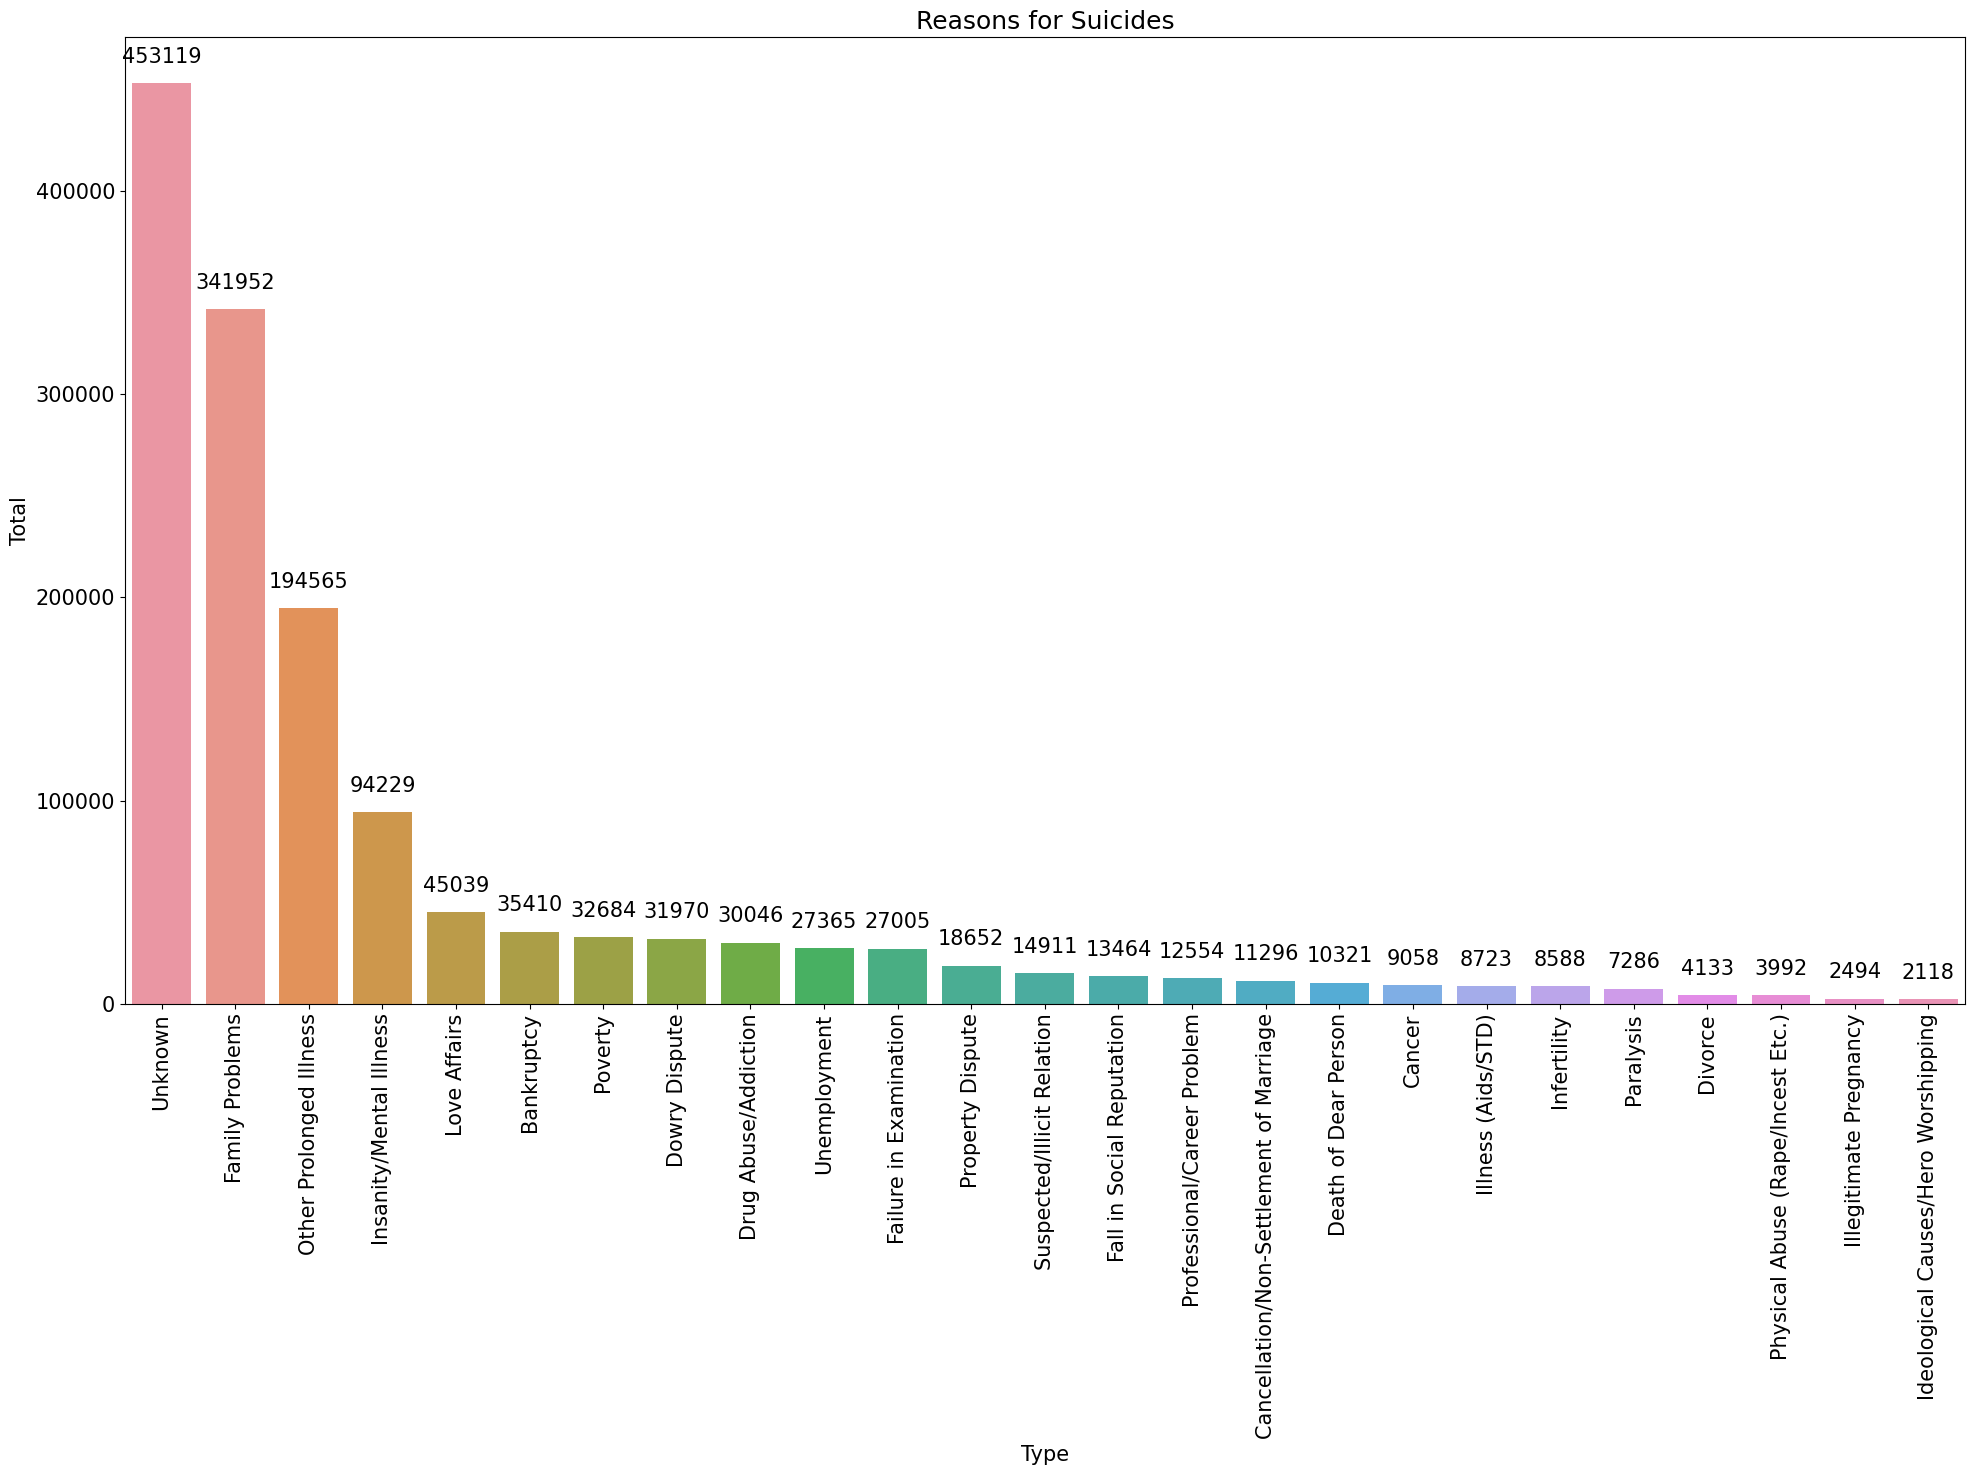

In [27]:
#df.sort_values(['job','count'],ascending=False).groupby('job').head(3)
set1 = reasons_set[['Type','Total']]
set1 = set1.groupby('Type').sum()
set1.reset_index(inplace = True)
set1 = set1.sort_values('Total', ascending = False)
set1 = set1.reset_index(drop=True)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize= (20,15)) # Make a plot size
trace = sns.barplot(x = set1['Type'], y = set1['Total'], data = set1, orient = 'v')
# Adding values on the top of the bars
for index, row in set1.iterrows():
    trace.text(x = row.name, y = row.Total+ 10000, s = str(row.Total),color='black', ha="center")
plt.title('Reasons for Suicides')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Observations :  Family Problems, Illness, Love afairs are in the top reasons list.  -- Are we proud of our family system

**Suicide Reasons and Gender**

<Figure size 2000x1000 with 0 Axes>

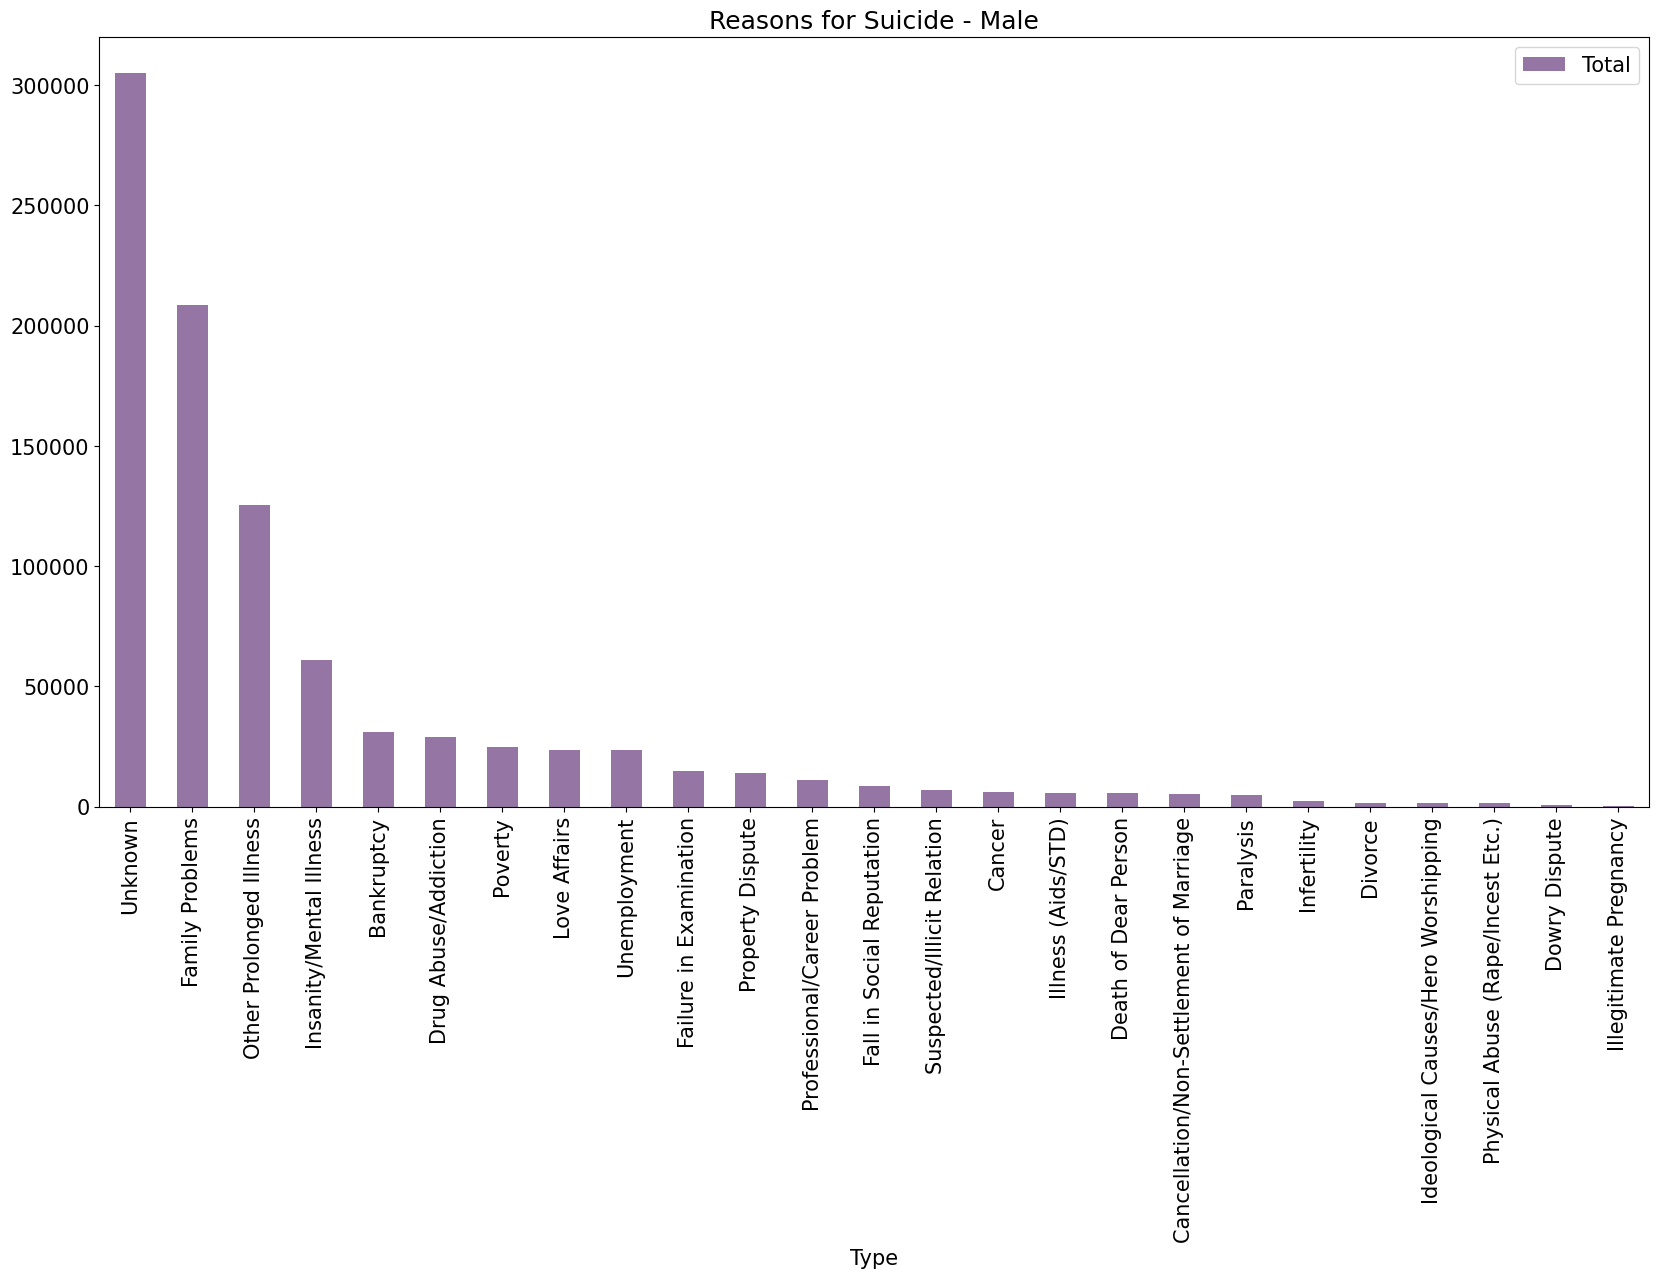

In [29]:
# Reasons for Males suicides
gender_set = reasons_set[['Type', 'Gender', 'Total']]
male_set = gender_set[gender_set['Gender'] == 'Male']
male_set = male_set.groupby('Type')['Total'].agg('sum').reset_index()
male_set = male_set.sort_values('Total', ascending=False)
male_set.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
male_set.plot(kind='bar', x='Type', figsize=(20, 10), color=(0.3, 0.1, 0.4, 0.6))
plt.xticks(rotation=90)
plt.title("Reasons for Suicide - Male")
plt.show()


<Figure size 2000x1000 with 0 Axes>

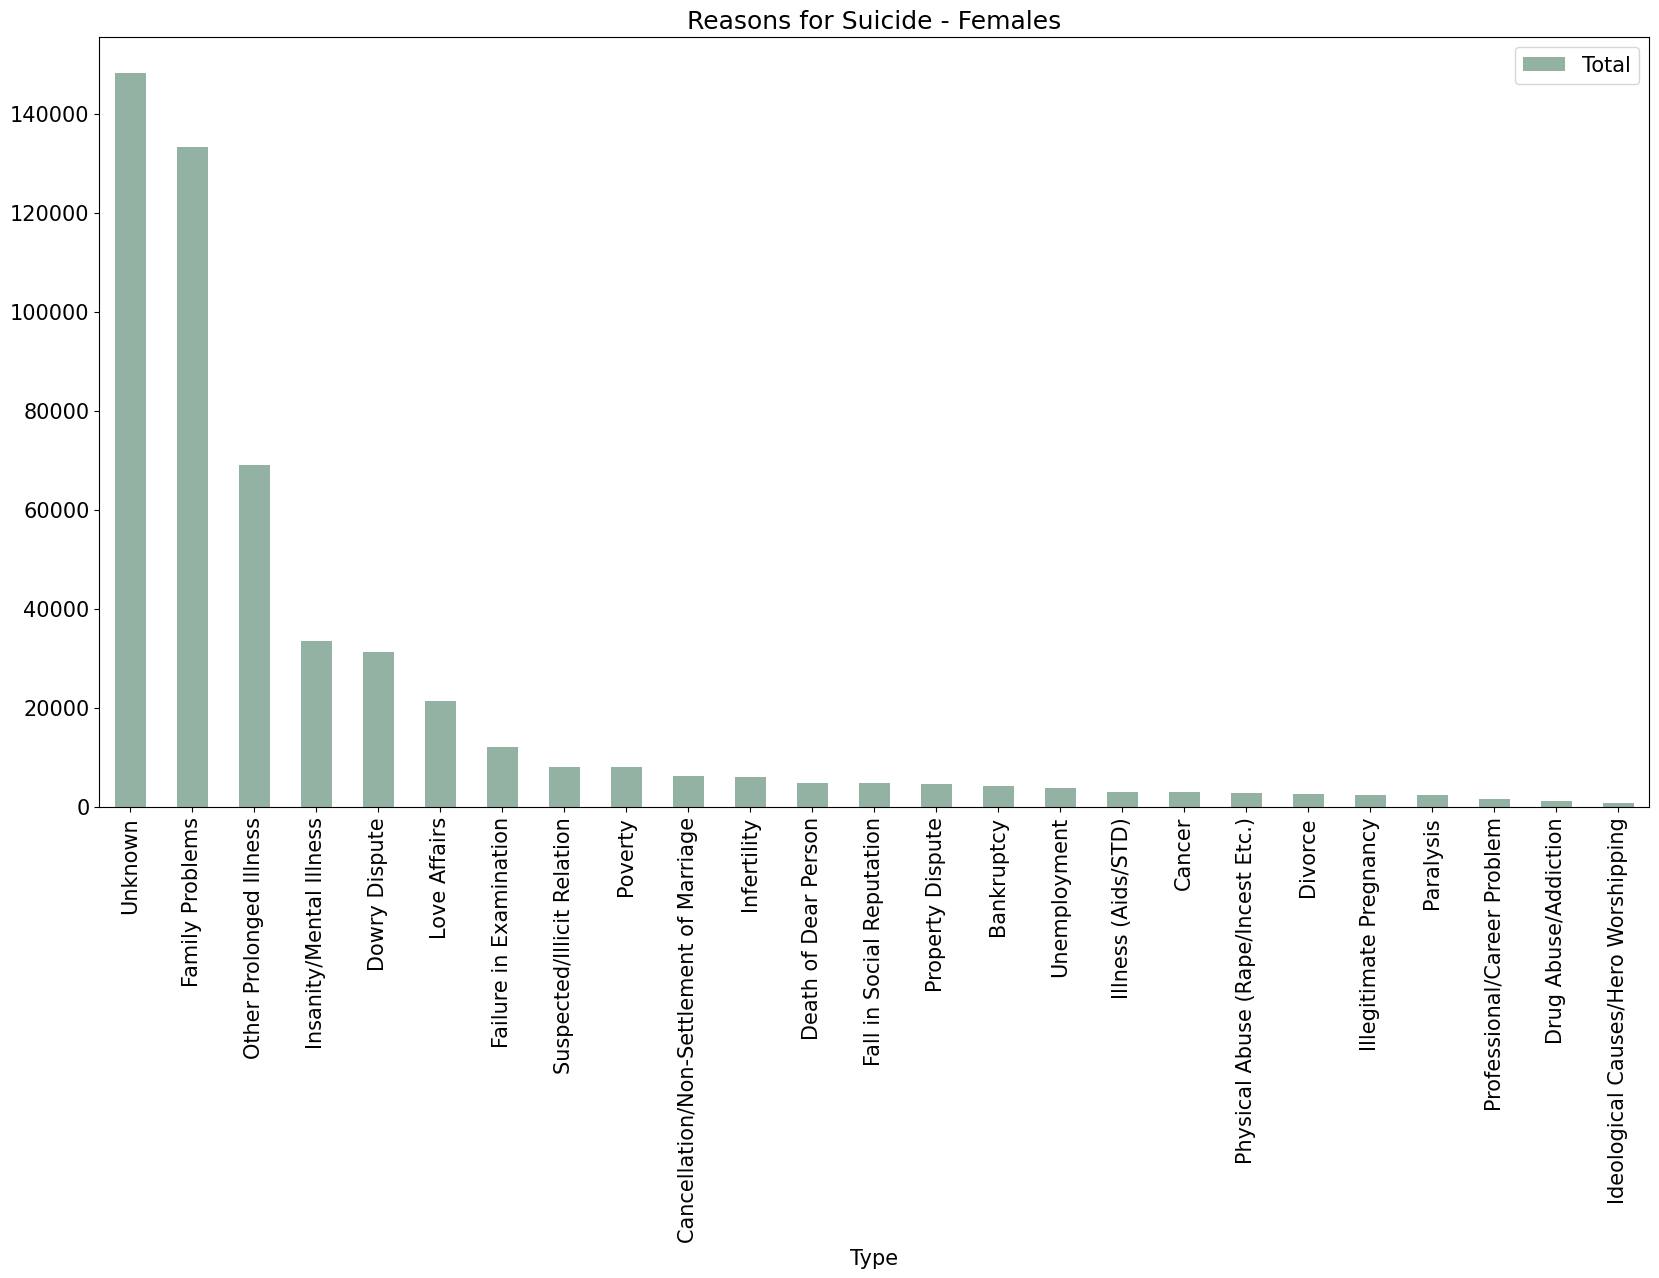

In [30]:
# Reasons for females suicides
gender_set = reasons_set[['Type', 'Gender', 'Total']]
female_set = gender_set[gender_set['Gender'] == 'Female']
female_set = female_set.groupby('Type')['Total'].agg('sum').reset_index()
female_set = female_set.sort_values('Total', ascending=False)
female_set.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
female_set.plot(kind='bar', x='Type', figsize=(20, 10), color=(0.3, 0.5, 0.4, 0.6))
plt.xticks(rotation=90)
plt.title("Reasons for Suicide - Females")
plt.show()


In [32]:
total_set = pd.concat([female_set, male_set], axis = 1)
total_set.columns = ['Type', 'Female', 't', 'Male']
total_set = total_set.drop(columns = ['t'])
female_more = total_set[total_set['Female'] > total_set['Male']]
female_more

,Type,Female,Male
4,Dowry Dispute,31206,31175
19,Divorce,2535,2521
20,Illegitimate Pregnancy,2391,1598
21,Paralysis,2284,1342
22,Professional/Career Problem,1596,1330
23,Drug Abuse/Addiction,1205,764
24,Ideological Causes/Hero Worshipping,776,103


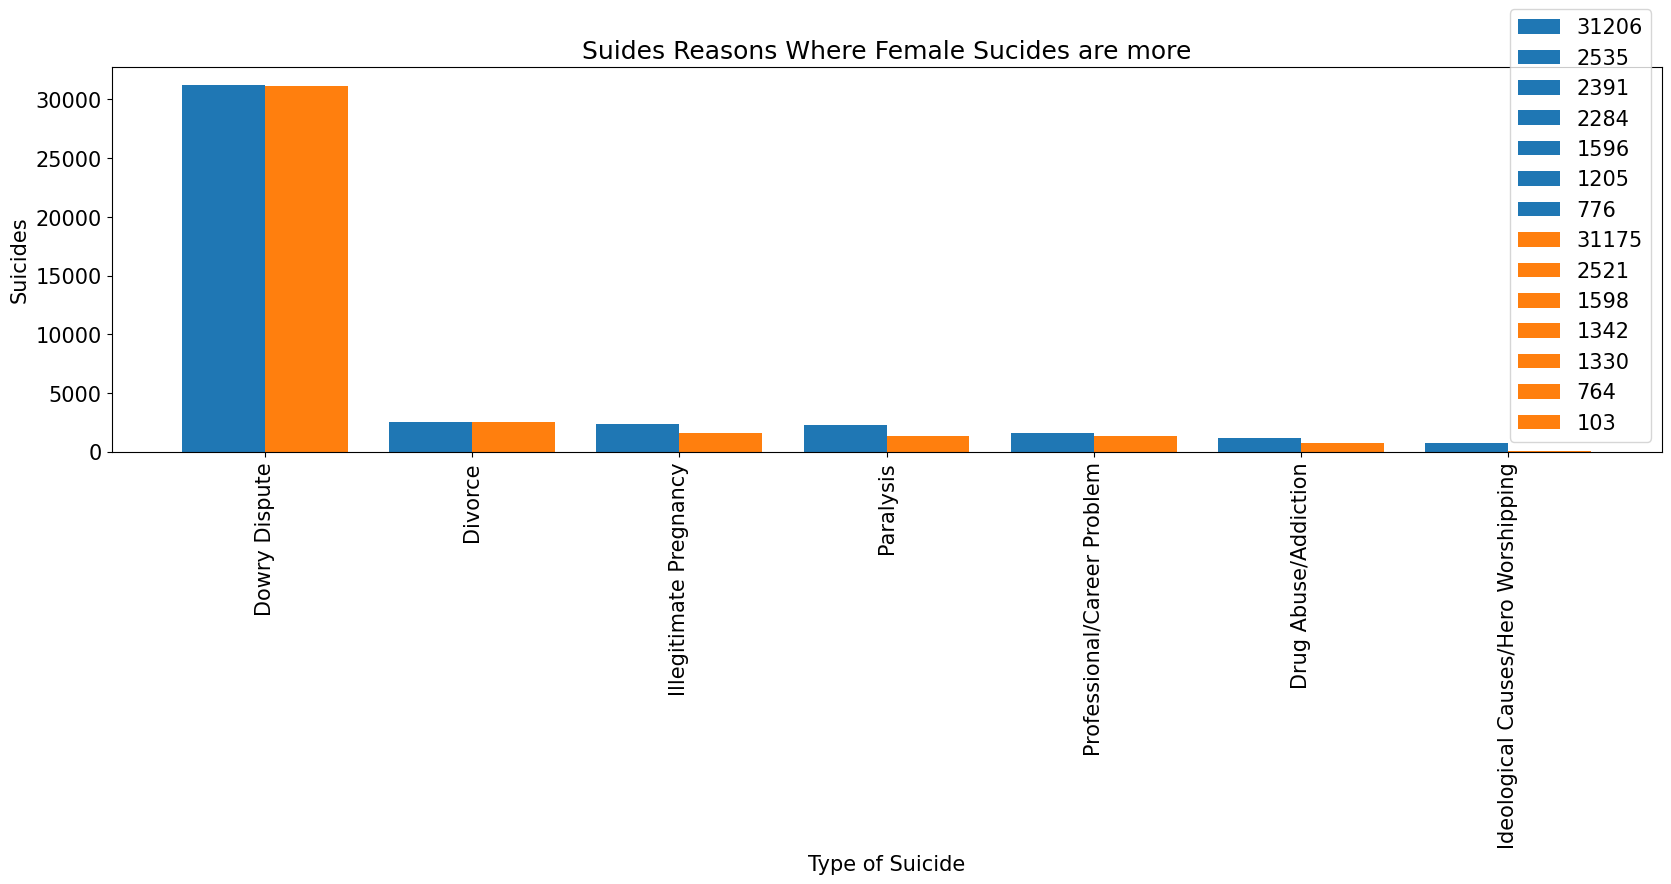

In [33]:
fig = plt.figure(figsize=(20,5))
N= len(female_more)
ind = np.arange(N); width = 0.4
category = list(female_more['Type'])
plt.bar(x = ind, height = 'Female', data = female_more, width = width, label = 'Female')
plt.bar(x = ind+width, height = 'Male', data = female_more, width = width, label = 'Male')
plt.xlabel("Type of Suicide")
plt.ylabel("Suicides")
plt.title("Suides Reasons Where Female Sucides are more")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.legend(loc='best')
plt.show()

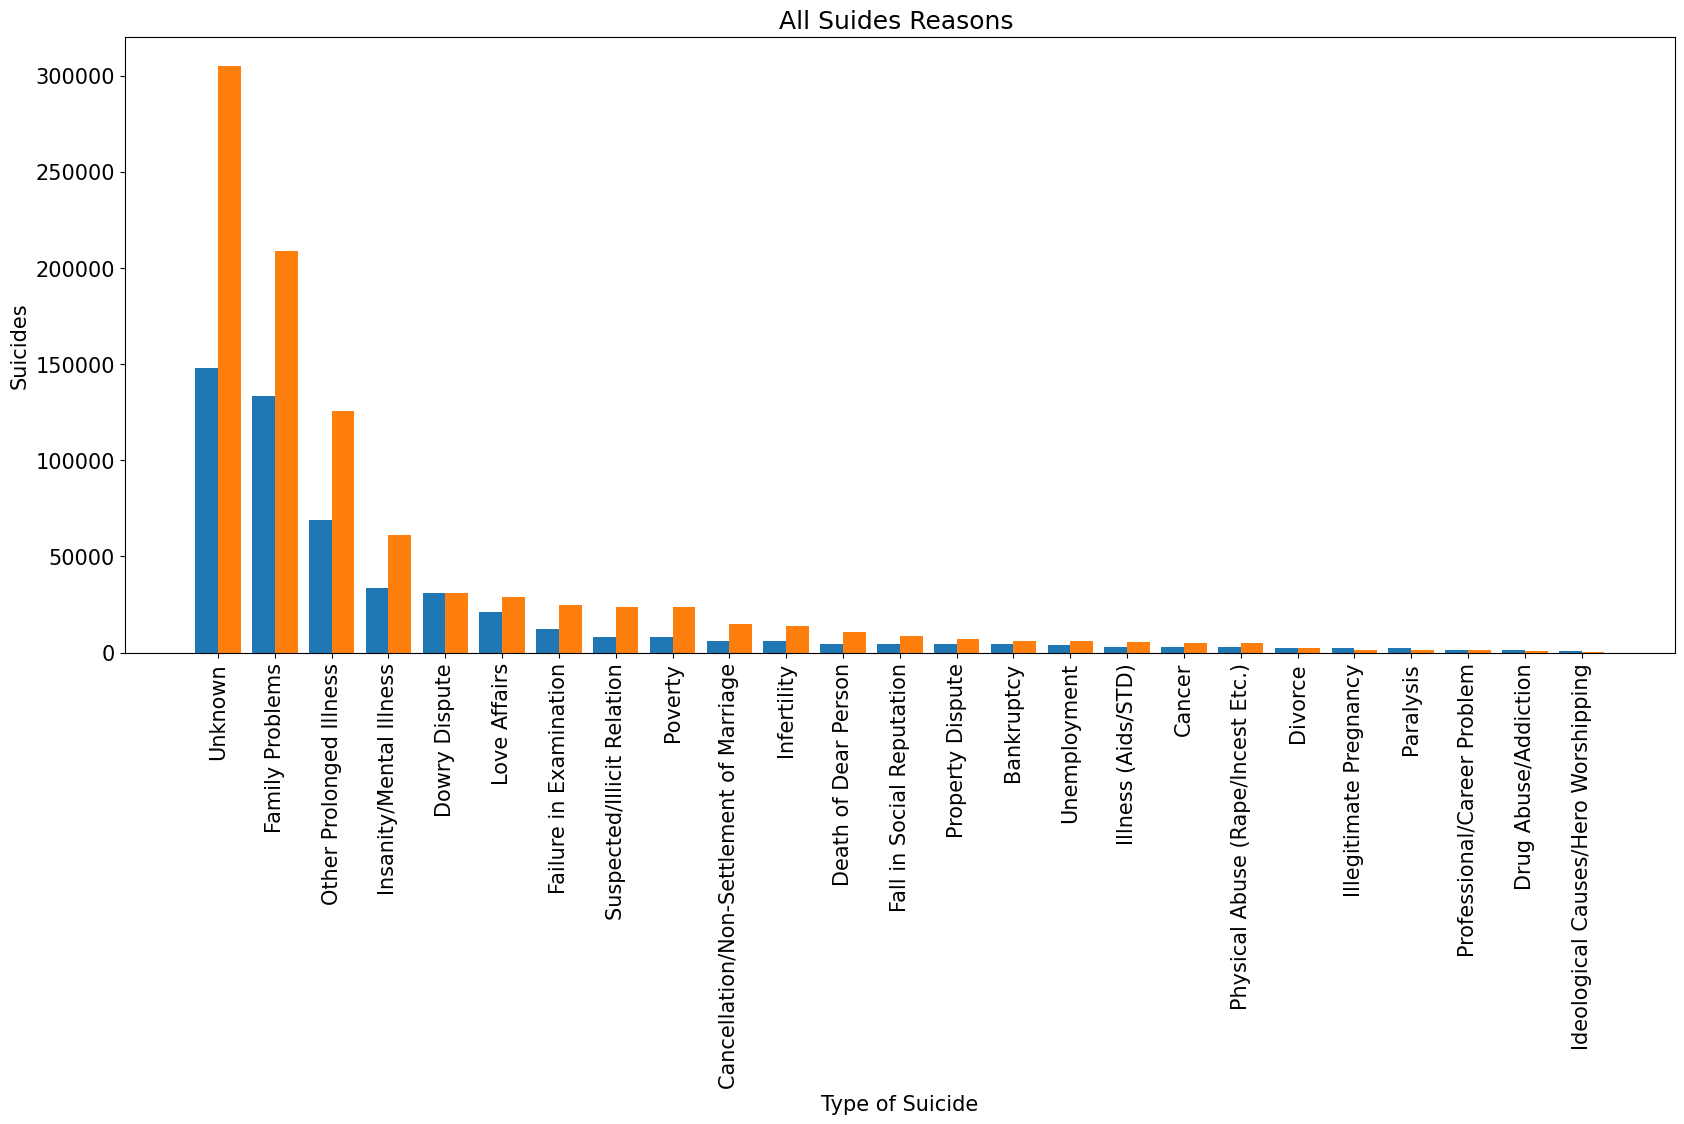

In [34]:
fig = plt.figure(figsize=(20,8))
N= len(total_set)
ind = np.arange(N); width = 0.4
category = list(total_set['Type'])
plt.bar(x = ind, height = 'Female', data = total_set, width = width, label = 'Female')
plt.bar(x = ind+width, height = 'Male', data = total_set, width = width, label = 'Male')
plt.xlabel("Type of Suicide")
plt.ylabel("Suicides")
plt.title("All Suides Reasons ")
plt.xticks(ind + width / 2, category,rotation='vertical')
plt.show()

1. Men seem  to be more vulnerable to commit suicide.
2. "Family problems" is the  major reason for all the  suicides irrespective of the  gender
3. Dowry Dispute is second highest reason for women to commit suicide.
4. Dowry Dispute , Infertility , Physical abuse are the reasons where Women suicide rate is more than men.
5. Love affairs  is the reason where  suicide rate is alomost same in  Men and Women.



**Age Group and Reasons for Suicide**

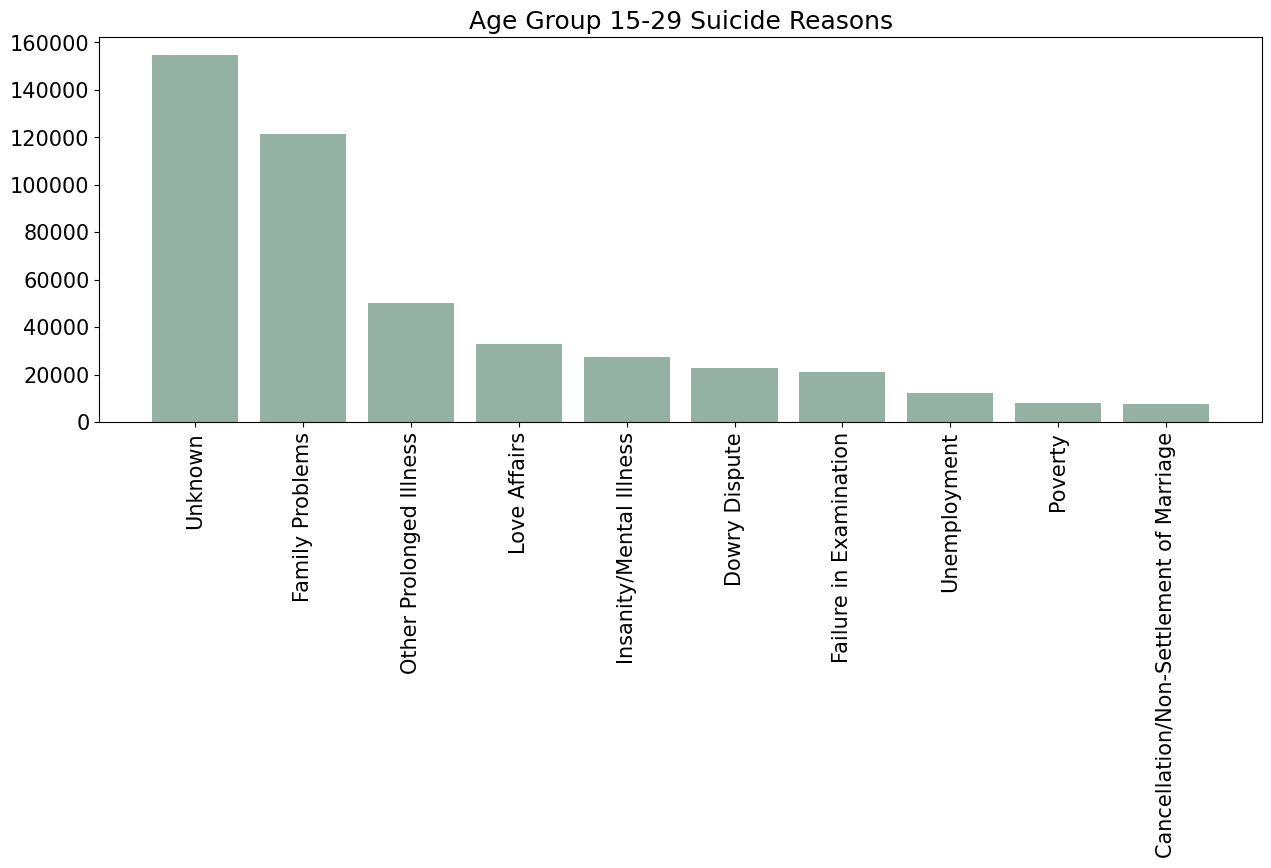

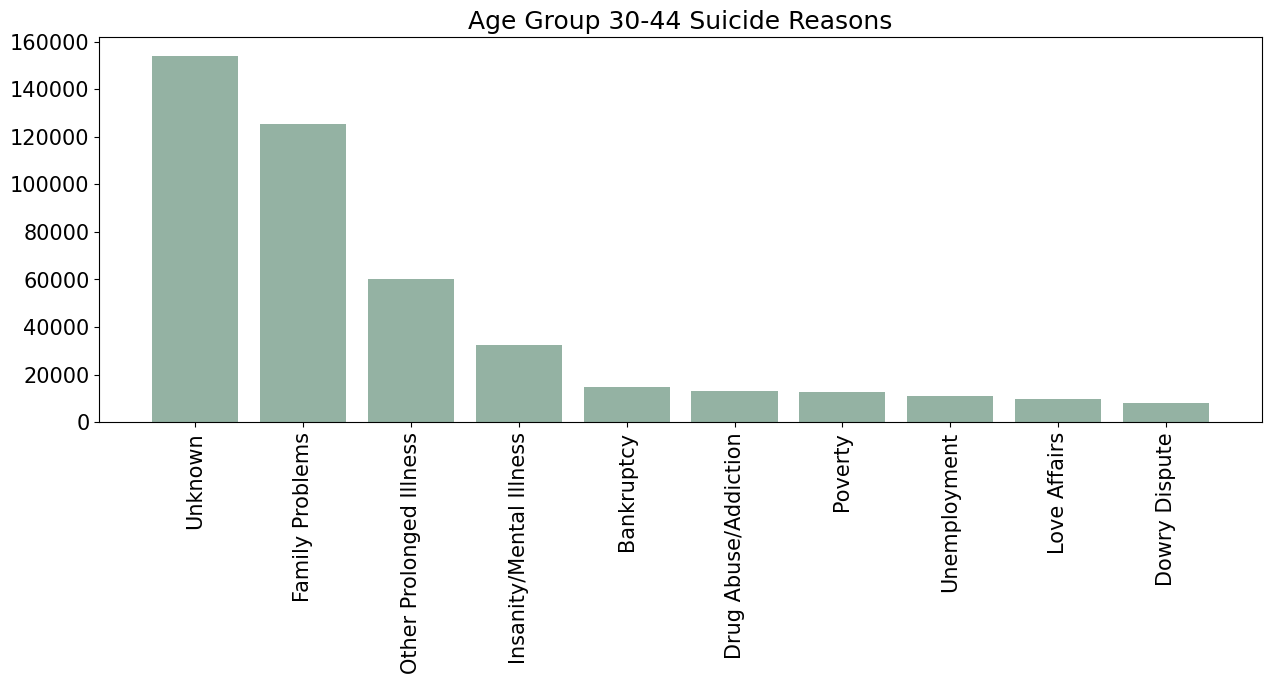

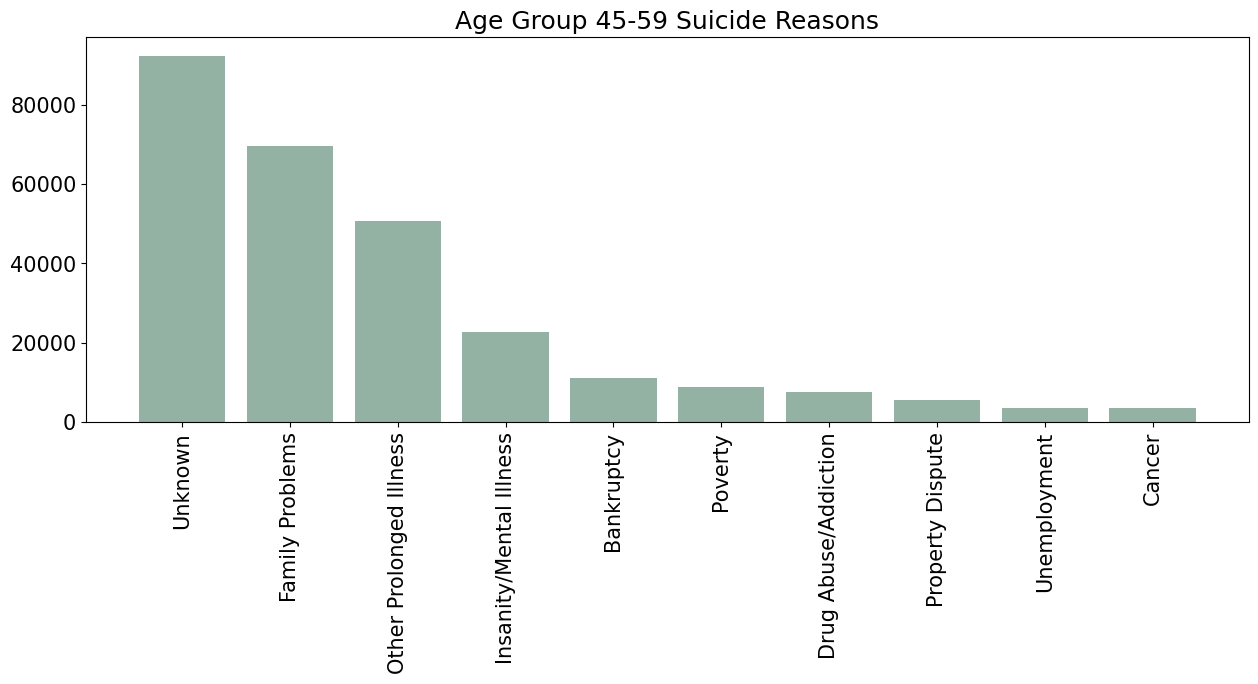

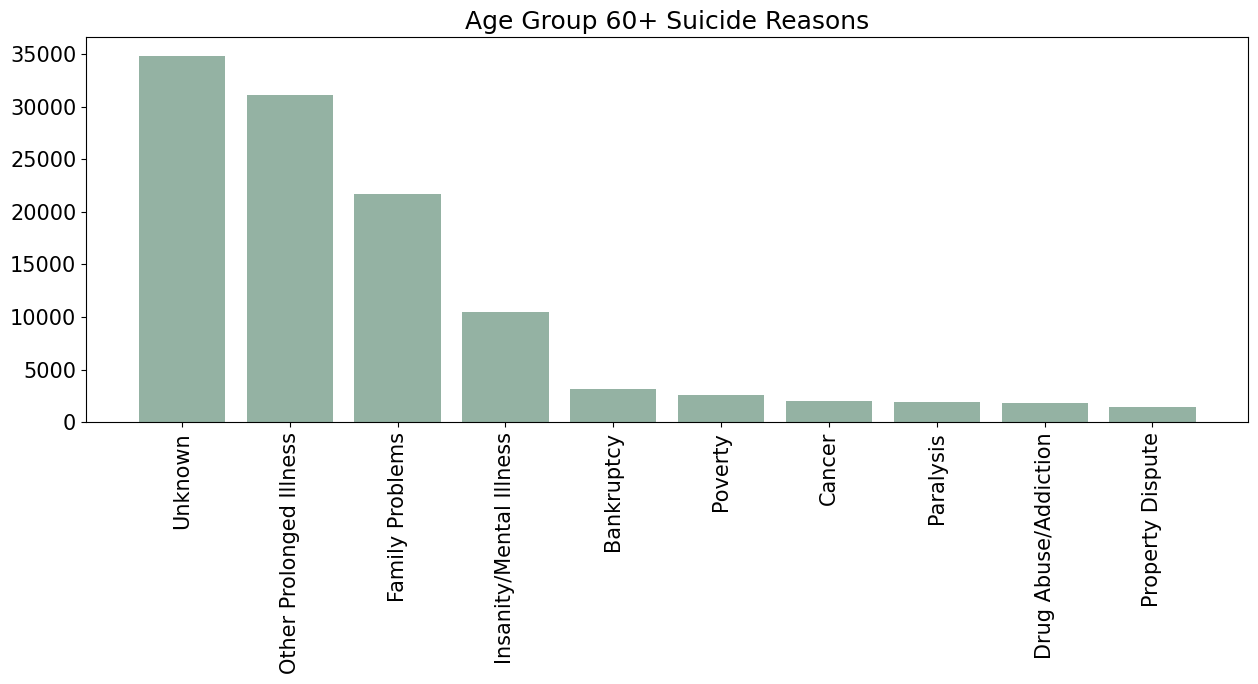

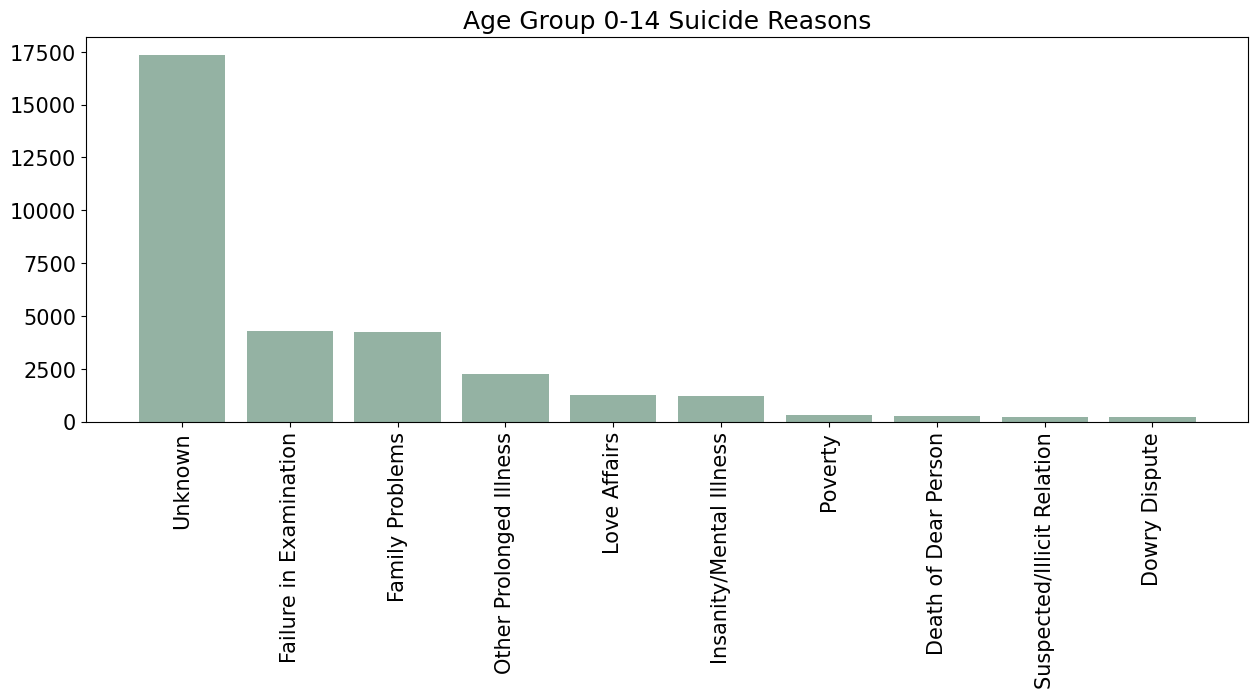

In [35]:
age_set = reasons_set[['Type', 'Age_group', 'Total']]
age_grp = reasons_set['Age_group'].value_counts().index
age_grp = list(age_grp)

for x in age_grp:
    group_set = age_set[age_set['Age_group'] == x]
    group_set = group_set.groupby('Type')['Total'].agg('sum').reset_index()
    group_set = group_set.sort_values('Total', ascending=False).head(10)

    plt.figure(figsize=(15, 5))
    plt.bar(group_set['Type'], group_set['Total'], color=(0.3, 0.5, 0.4, 0.6))
    plt.xticks(rotation=90)
    plt.title('Age Group ' + x + ' Suicide Reasons')
    plt.show()


From top 10 Reasons of each age group  the following observation were drawn
1. Age group 0-14, 15-29 Love affairs is one of the top ten reasons
2. Age group 0-14 --Failure in  Examination is the second  Strong reason -- Sad to note this.
3. Family Problems is the strongest reason in all the age groups --  Are we still proud of our family sytems?.
4. Prolonged illness is the  strongest reason for age group Age 60+ -- This is some what anticipated
5. Ingeneral  illness is appearing as the strongest reason irrespective of age group and gender
6. Unknown reasons are highest --  Data collection is not effective enough.  


Yearwise  Reasons count - How it is changing?

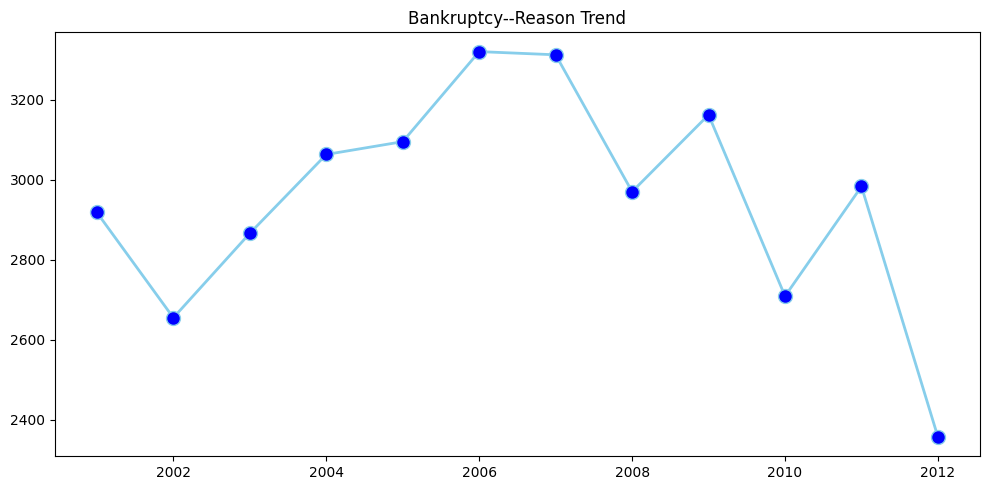

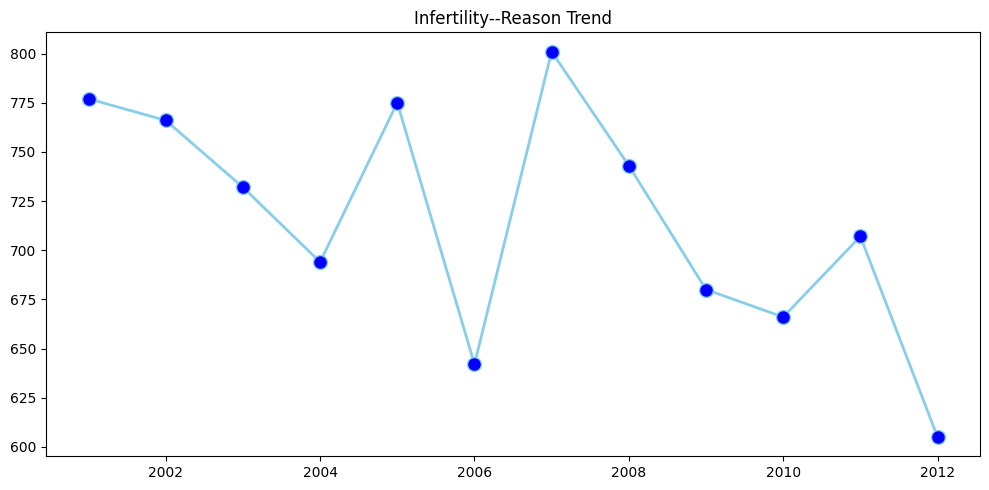

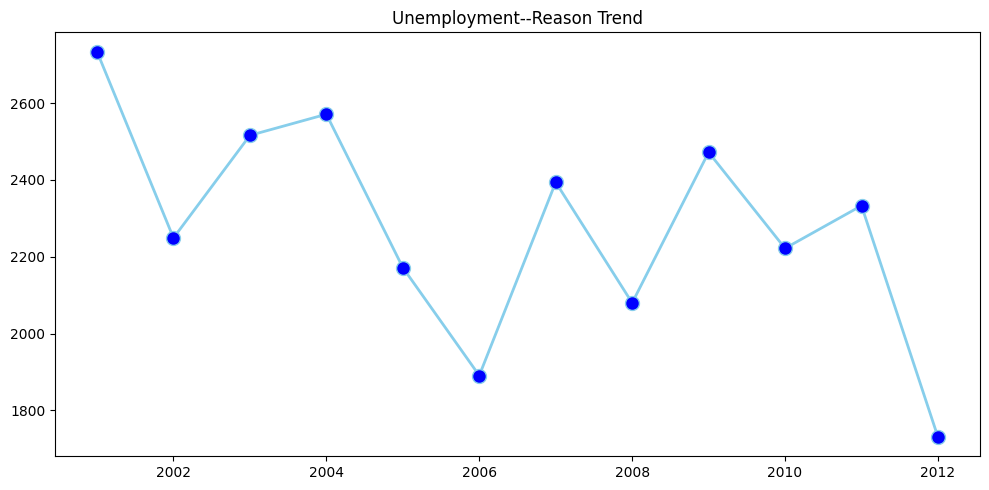

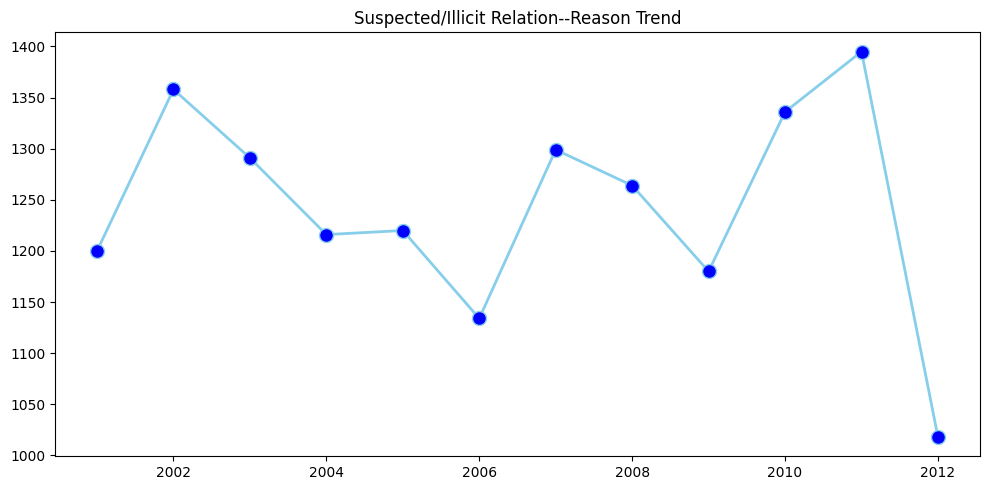

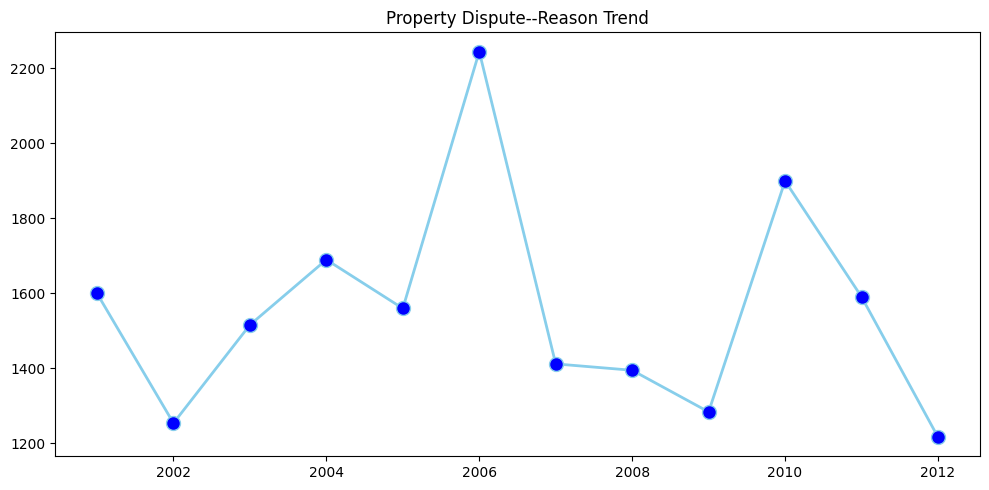

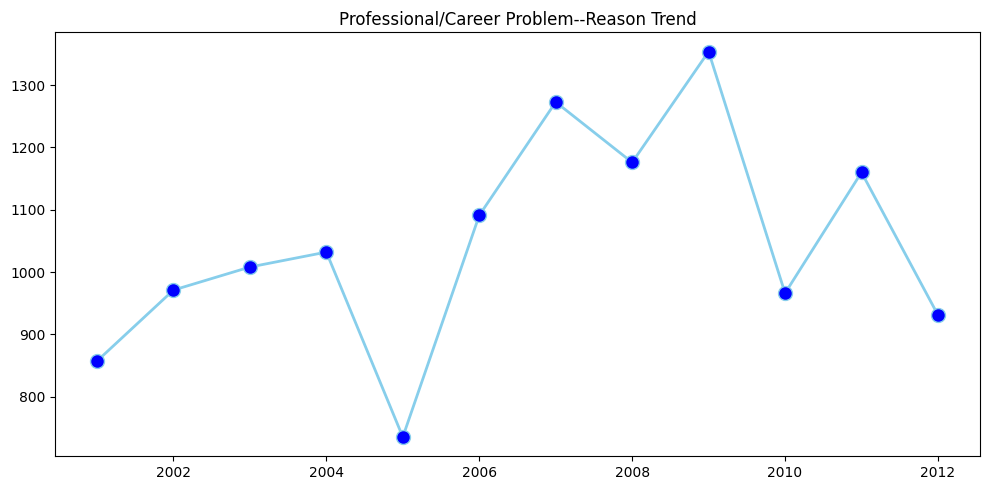

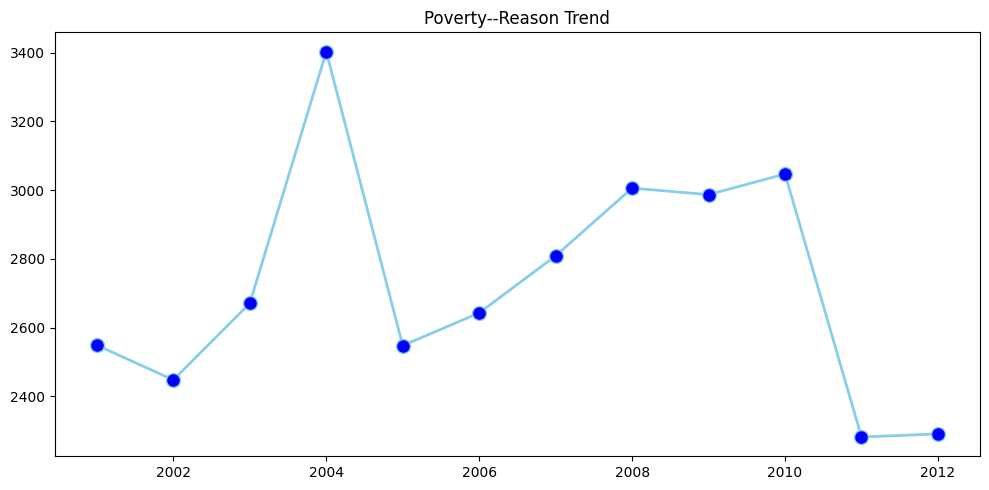

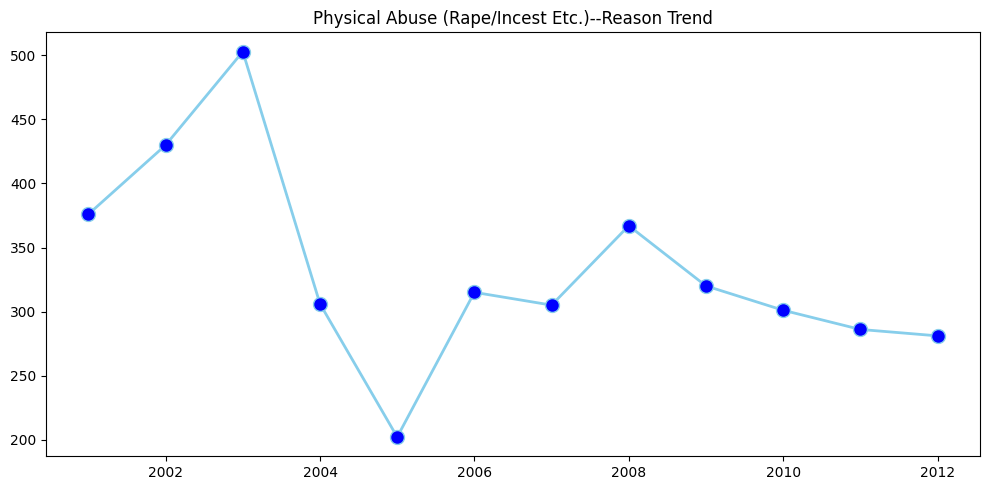

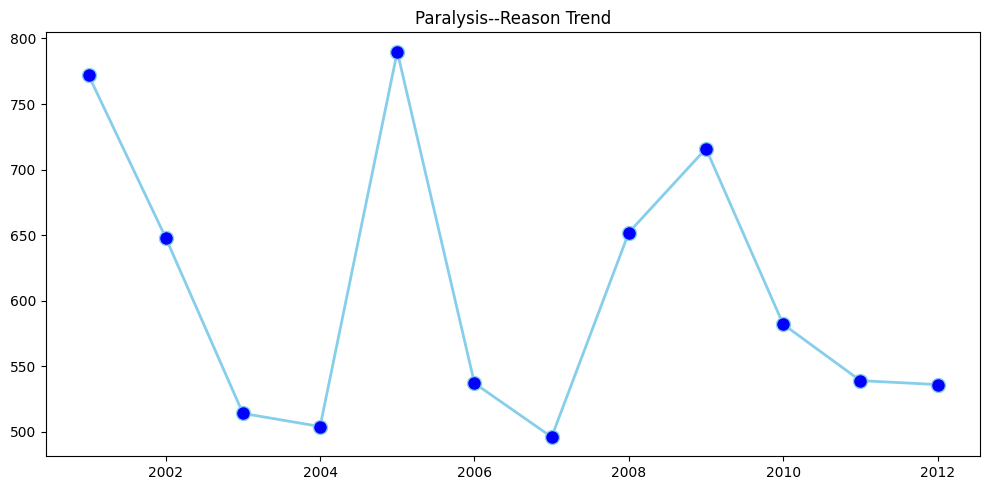

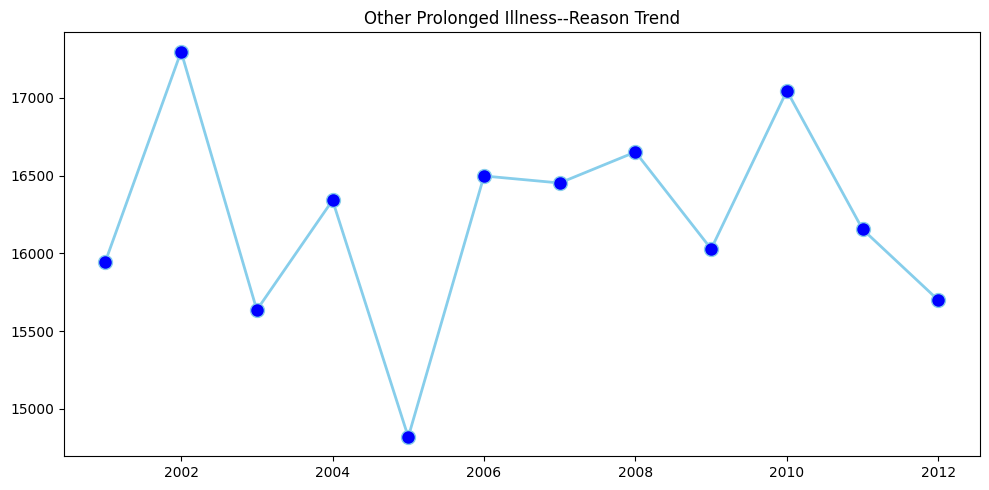

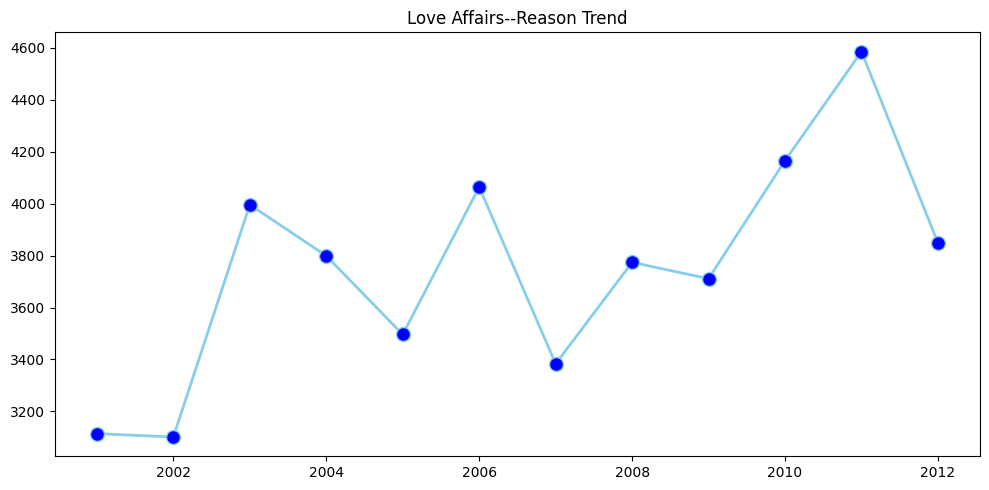

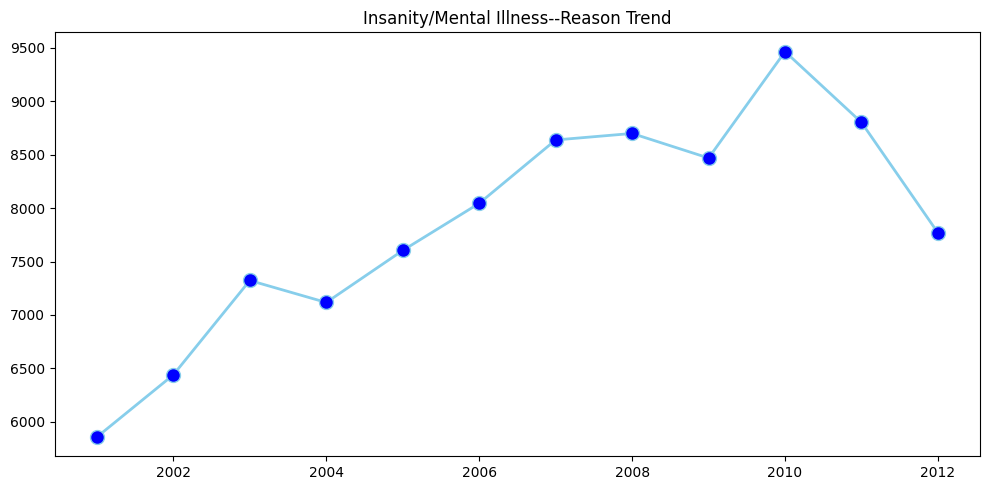

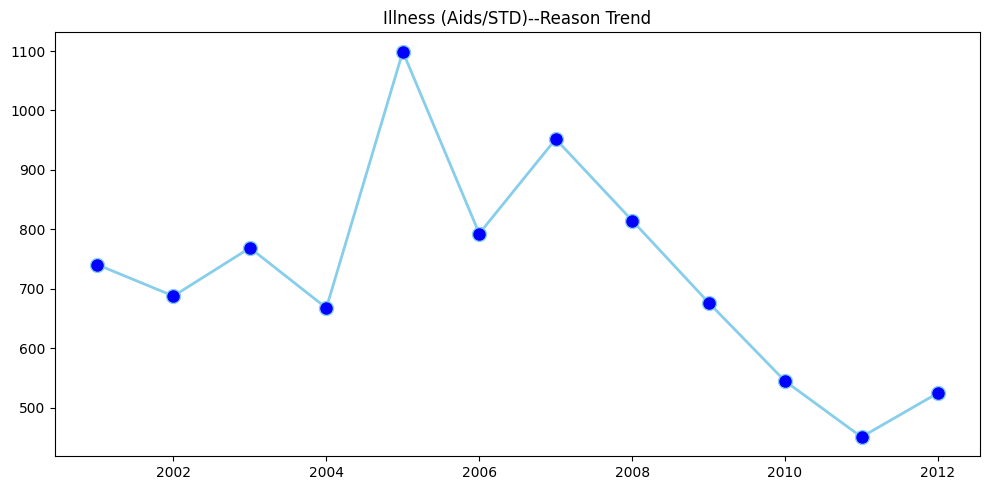

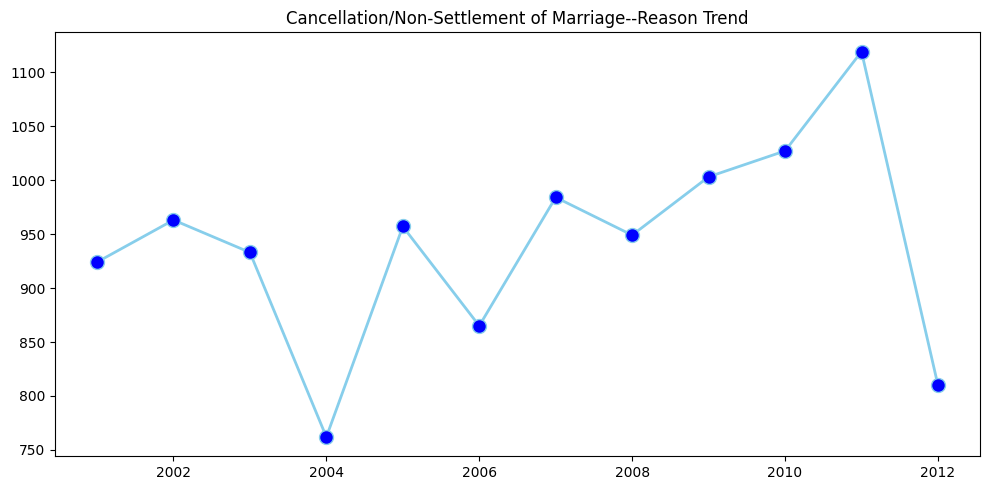

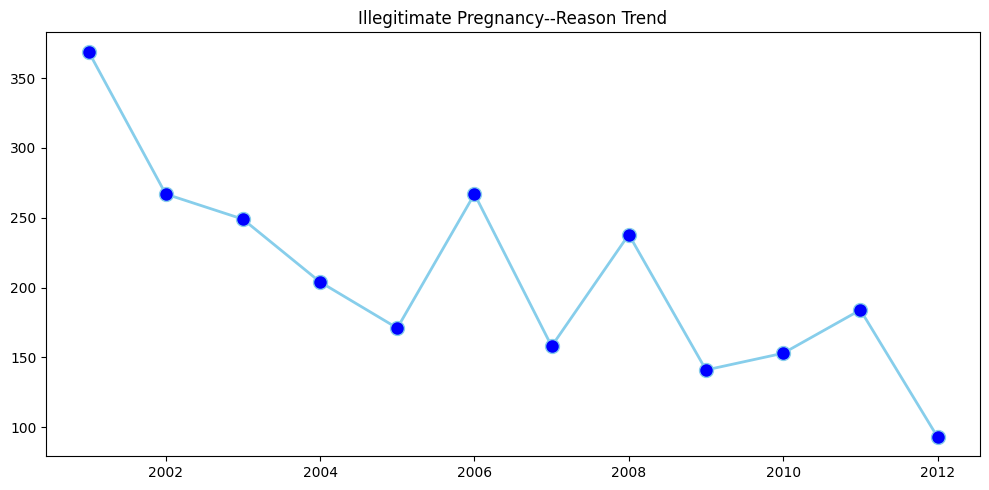

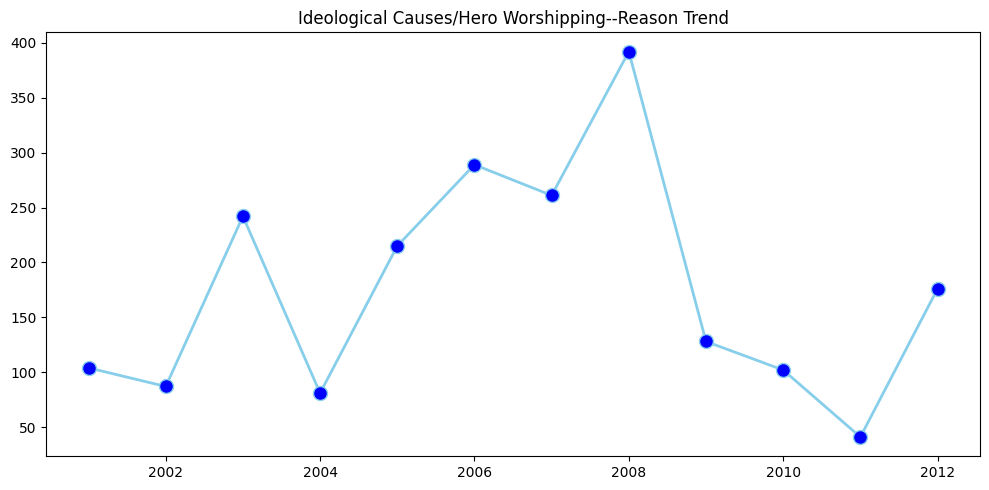

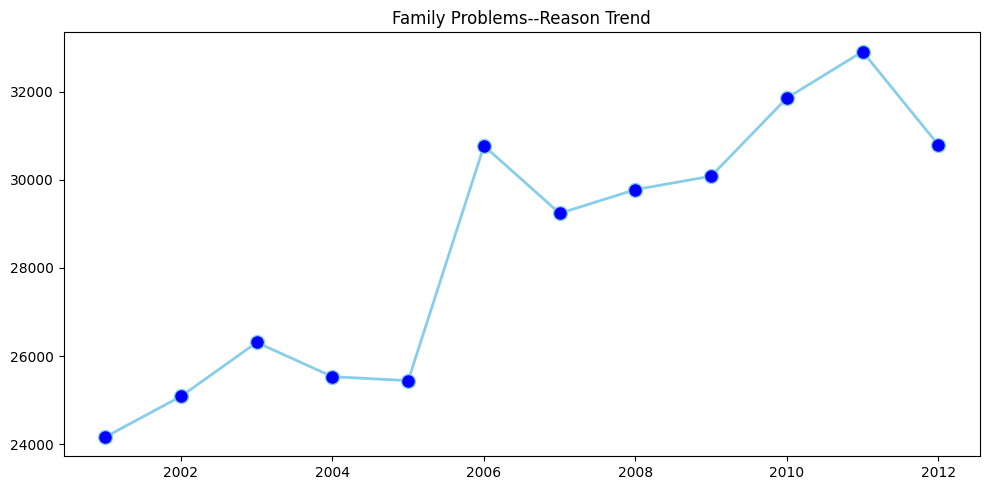

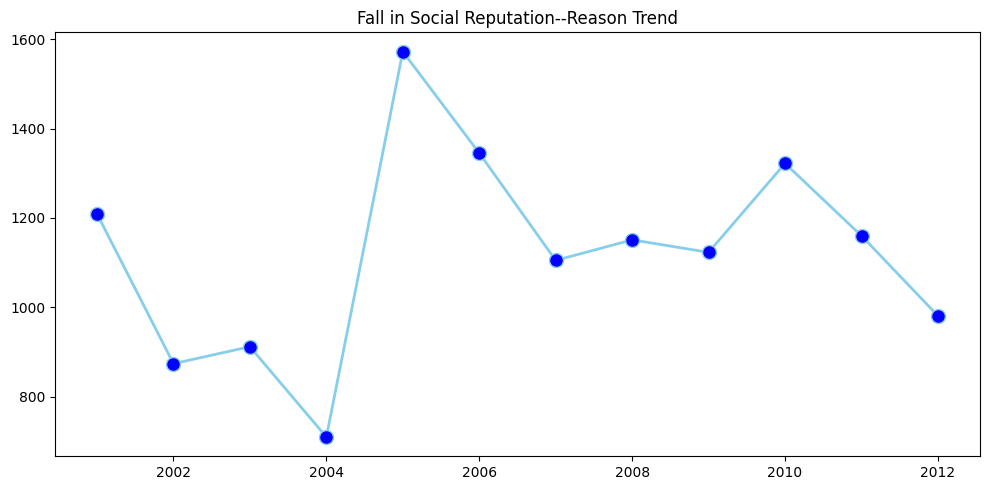

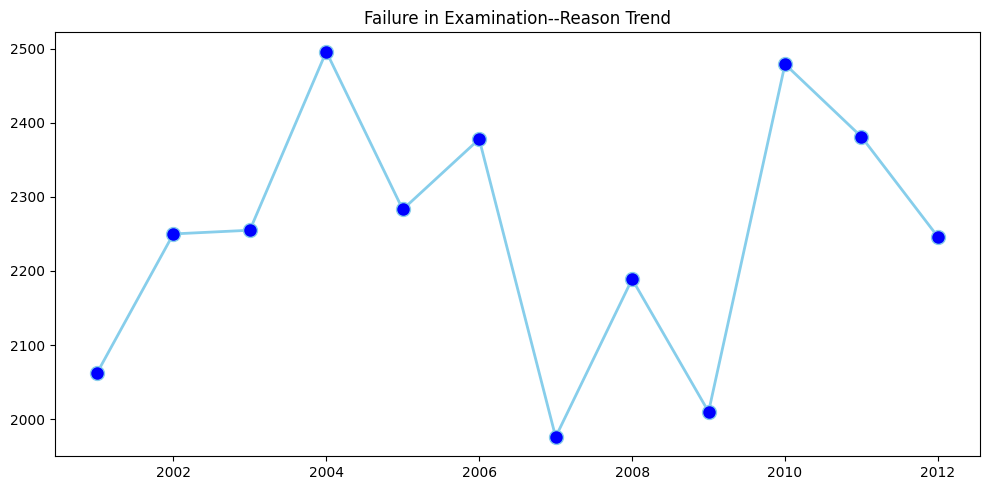

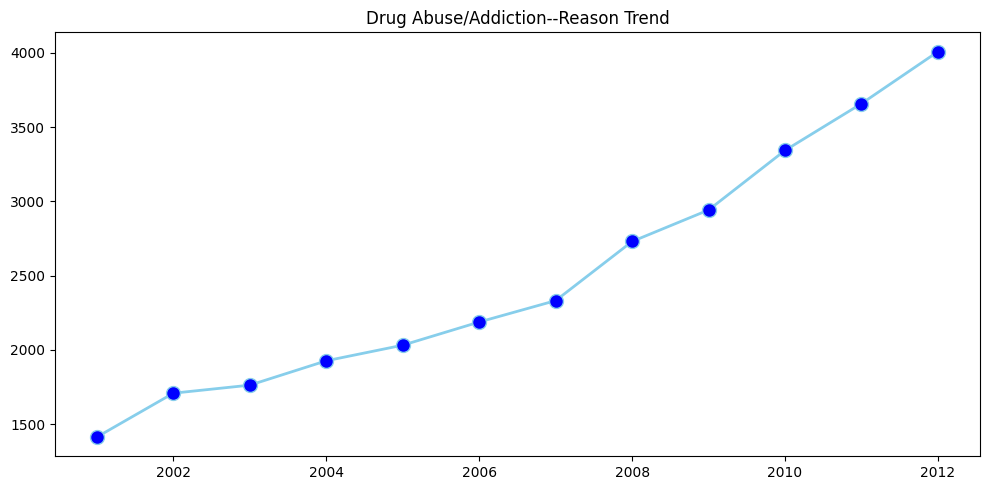

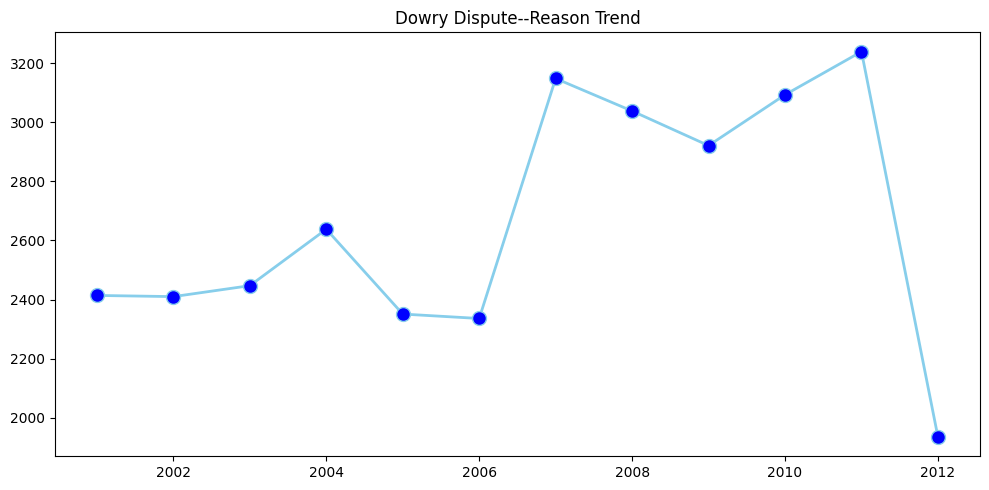

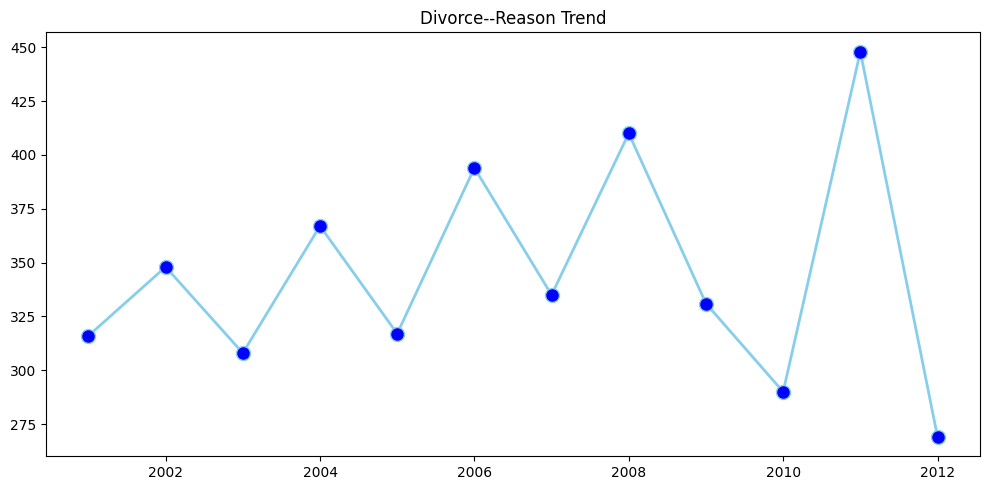

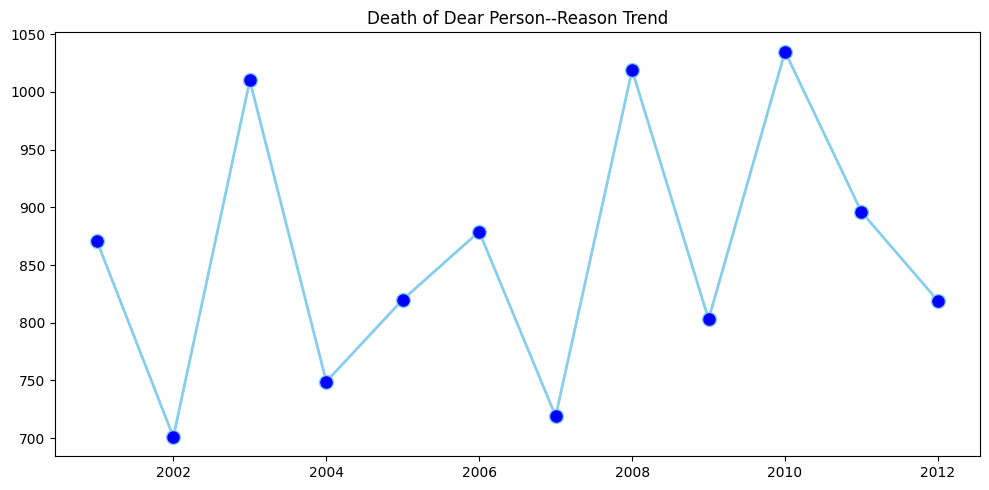

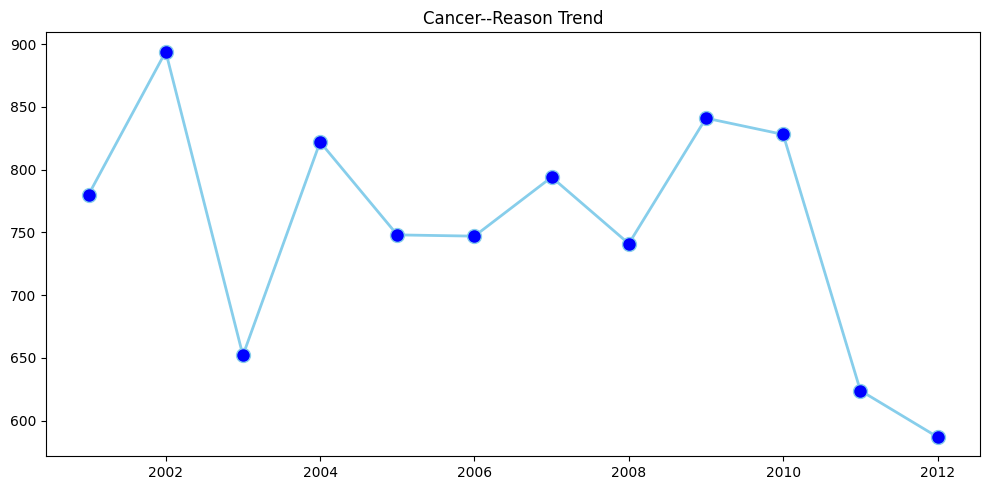

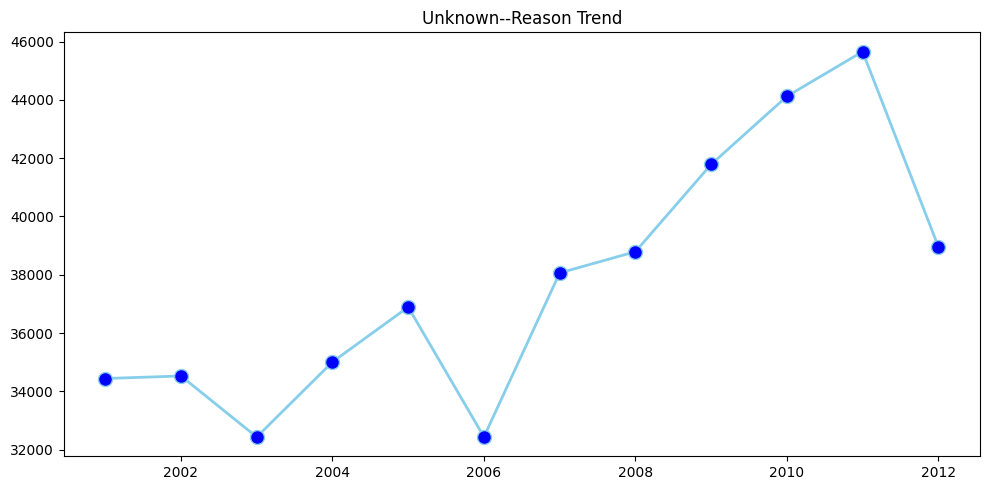

In [36]:
# Year wise, how the reasons are changing
year_reasons = reasons_set[['Year', 'Type', 'Total']]
year_reasons = year_reasons.groupby(['Type', 'Year']).sum().reset_index()
reasons = year_reasons['Type']
reasons = reasons.value_counts()
years = year_reasons['Year'].values
years  = list(years)
count = 1
reasons = list(reasons.index)
for var in reasons:
    plt.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize = (10,5))
    trace1 =  year_reasons[year_reasons['Type'] == var]
    plt.plot( 'Year', 'Total', data=trace1, marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2)
    plt.title(var + '--Reason Trend')
    plt.tight_layout()
    plt.show()

Observations :  
1. Drug Abuse/Addiction trend is is linearly increasing  -- More than doubled
2. Family problems also shows upward trend
3 .Unemployment trend is showing decline - Employment opportunites are growing
4. Love affairs show increased trend.


**States and overall suicides count**

<Figure size 2000x1500 with 0 Axes>

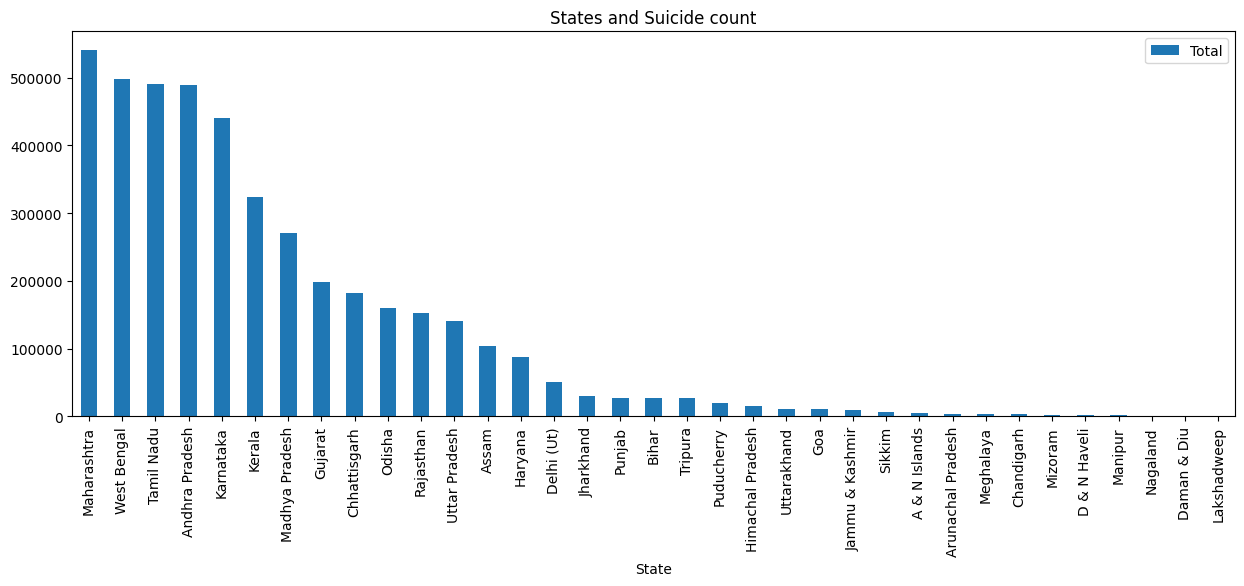

In [37]:
state_count = df[['State','Total']]
state_count = state_count.groupby('State').sum()
state_count = state_count.sort_values('Total', ascending = False)
state_count = state_count.reset_index()
plt.figure(figsize = (20,15))
state_count.plot(kind = 'bar',x = 'State', figsize = (15,5), title = 'States and Suicide count')
plt.show()

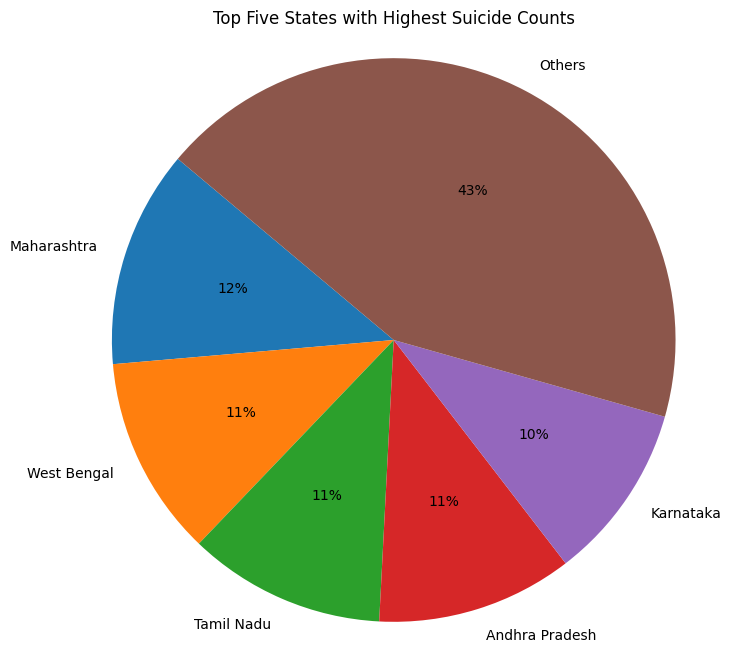

In [38]:
top_five_states = state_count.head(5)
other_states = state_count.iloc[5:]
other_states_total = other_states['Total'].sum()
others_row = pd.DataFrame({'State': ['Others'], 'Total': [other_states_total]})
combined_states = pd.concat([top_five_states, others_row])
plt.figure(figsize=(8, 8))
plt.pie(combined_states['Total'], labels=combined_states['State'], autopct='%1.0f%%', startangle=140)
plt.title('Top Five States with Highest Suicide Counts')
plt.axis('equal')
plt.show()

In [39]:
print('Top 5 States that recorded highest number of suicides')
print(state_count.head(5))

Top 5 States that recorded highest number of suicides
            State   Total
0     Maharashtra  541167
1     West Bengal  497962
2      Tamil Nadu  491065
3  Andhra Pradesh  488419
4       Karnataka  440895
